# Exploring the Results of Machine Learning #

In this notebook I explore some of the implications of the machine learning results.

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import pydotplus

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble

from IPython.display import SVG

## Visualizing Decision Trees ##

The decision tree was so effective, I thought it would be interesting to see if a single decision tree done on a subset of the data would still be interesting, perhaps for decision making for road designers.

I created a data set where the only features were:
- traffic_density: Average Annual Daily Traffic, measured by counting the total number of vehicles in a year and dividing by 365
- bike_acc_score: the number of bike accidents that happened in that area within 50m of each other
- ROW_Width: right of way width: includes road surface and property ceded by property owners
- Struct_Cnd: Structural condition
- Surface_Wd: Surface width
- Surface_Tp: Surface Type
- Rt_Sidewlk: right sidewalk width
- Lt_Sidewlk: left sidewalk width
- Terrain: terrain
- Med_Width: median width
- Op_Dir_SL: opposite direction speed limit

And then created a decision tree from those features.

In [2]:
#build smaller feature set
#read in data set before making dummies
sel_df = pd.read_csv('data/cleaned_data/model_df.csv')
sel_df = sel_df[['car_acc_score', 'traffic_density', 'bike_acc_score', 'ROW_Width', 'Surface_Wd', 'Surface_Tp', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Struct_Cnd', 'Terrain',
                'Med_Width', 'Op_Dir_SL']]
sel_dum = pd.get_dummies(sel_df, columns=['Struct_Cnd', 'Terrain', 'Surface_Tp'])
sel_dum.head()

,car_acc_score,traffic_density,bike_acc_score,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Struct_Cnd_-1,...,Surface_Tp_1,Surface_Tp_2,Surface_Tp_3,Surface_Tp_4,Surface_Tp_5,Surface_Tp_6,Surface_Tp_7,Surface_Tp_8,Surface_Tp_9,Surface_Tp_10
0,1,1.707255,10,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.186701,4,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.345786,1,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.470252,10,55.0,30.0,5.0,5.0,0.0,99,0,...,0,0,0,0,0,0,1,0,0,0
4,0,2.013781,1,55.0,30.0,5.0,5.0,0.0,99,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
car_y = sel_dum.car_acc_score
car_X = sel_dum.drop(columns=['car_acc_score'])
car_c_y = sel_dum.car_acc_score.mask(sel_dum.car_acc_score > 0, 1)

# do train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)

In [4]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X_car_c_train, y_car_c_train)
dtc.score(X_car_c_test, y_car_c_test)

0.8681926518864955

Even with only the features listed above, and limiting the depth to 5, a single decsion tree can still predict accidents with 87% accuracy. So the decision tree would be useful for road design decision-makers to help them predict accidents.

In [5]:
fn = X_car_c_train.columns
cn = ['Accident', 'No Accident']
dot_data = tree.export_graphviz(dtc, feature_names=fn, class_names=cn, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()
graph.write_png('car_decision_tree.png')

True

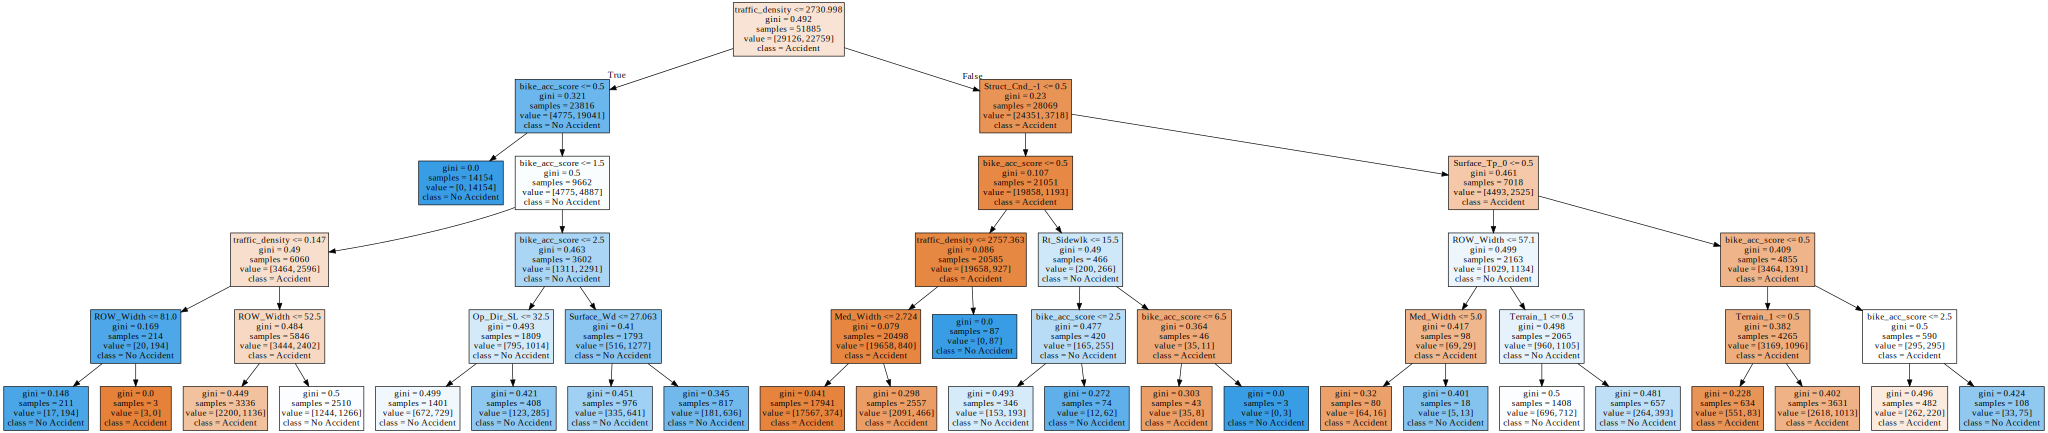

In [6]:
graph = graphviz.Source(dot_data)
graph

Similarly for bike accidents, let's see if we can create a small(ish), meaningful decision tree.

In [7]:
#build smaller feature set
#read in data set before making dummies
bike_df = pd.read_csv('data/cleaned_data/model_df.csv')
bike_df = bike_df[['car_acc_score', 'bike_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width',
                 'Op_Dir_SL', 'Struct_Cnd', 'Operation', 'Terrain', 'F_Class']]
bike_dum = pd.get_dummies(bike_df, columns=['Struct_Cnd',
                                         'Operation', 'Terrain', 'F_Class'])
bike_dum.head()

,car_acc_score,bike_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Struct_Cnd_-1,...,Terrain_1,Terrain_2,Terrain_3,F_Class_-1,F_Class_0,F_Class_1,F_Class_2,F_Class_3,F_Class_5,F_Class_6
0,1,10,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
1,0,4,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
3,1,10,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:

bike_X = bike_dum.drop(columns=['bike_acc_score'])
bike_c_y = bike_dum.bike_acc_score.mask(bike_dum.bike_acc_score > 0, 1)

# do train test split
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [13]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X_bike_c_train, y_bike_c_train)
dtc.score(X_bike_c_test, y_bike_c_test)

0.7921931915276341

[[17080   446]
 [ 4175   536]]


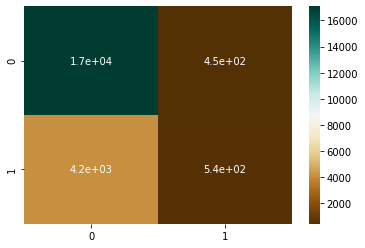

In [14]:
pred = dtc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)

In [15]:
fn = X_bike_c_train.columns
cn = ['Accident', 'No Accident']
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
#tree.plot_tree(dtc, feature_names=fn, class_names=cn, filled=True, impurity=False, fontsize=3)
#fig.savefig('car_tree.png')
#plt.show()
dot_data = tree.export_graphviz(dtc, feature_names=fn, class_names=cn, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()
graph.write_png('bike_decision_tree.png')

True

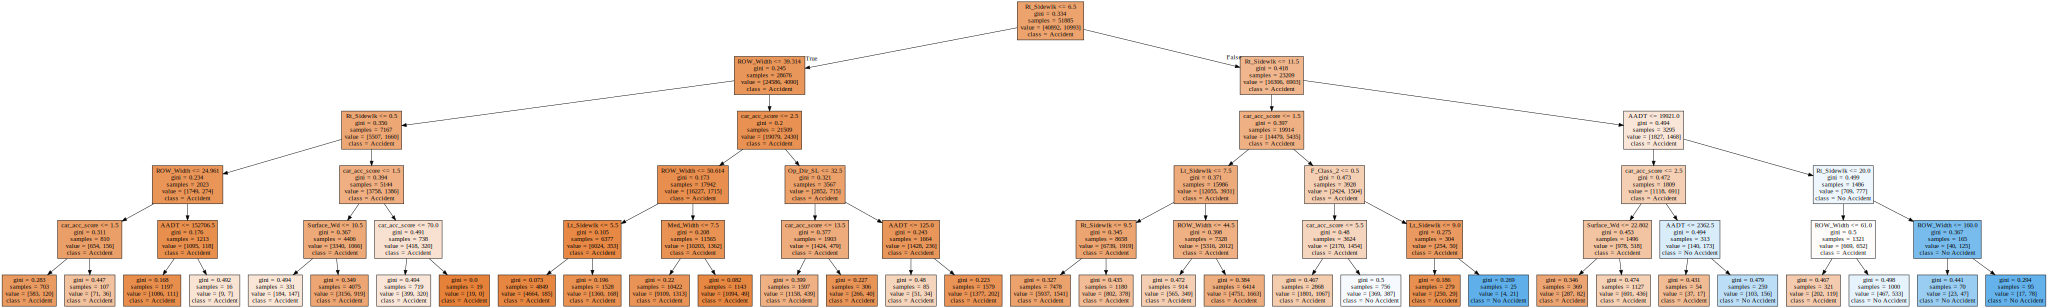

In [16]:
graph = graphviz.Source(dot_data)
graph

## Exploring the Confusion Matrix ##

The confusion matrices indicate how often the model predicts true and false negatives and positives. Because false positives may be places where accidents simply have not occured yet, I wanted to explore similarities between true and false negatives.

First I want to create a dataframe that allows me to visualize the means of features for true positives and false positives.

In [26]:
#rebuild the reduced feature set, but not as small as for the decision tree above
#read in data set before making dummies
sel_df = pd.read_csv('data/cleaned_data/model_df.csv')
sel_df = sel_df[['car_acc_score', 'traffic_density', 'bike_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 'Surface_Tp', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Route_System', 'Route_Direction', 'Struct_Cnd', 'Terrain',
                'Route_System', 'Med_Width', 'City_Maint', 'Jurisdictn', 'Op_Dir_SL']]
sel_dum = pd.get_dummies(sel_df, columns=['Route_System', 'Route_Direction', 'Struct_Cnd', 'Terrain', 'Surface_Tp',
                'Route_System', 'City_Maint', 'Jurisdictn'])

car_X = sel_dum.drop(columns=['car_acc_score'])
car_c_y = sel_dum.car_acc_score.mask(sel_dum.car_acc_score > 0, 1)

# do train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)

In [27]:
#use the best performing classifier on the reduced feature set
bc = ensemble.BaggingClassifier(random_state=18, n_estimators=100, max_features=0.75)
bc.fit(X_car_c_train, y_car_c_train)
pred = bc.predict(X_car_c_test)

# create dataframe of false positives
# create dataframe of true positives
# compare on top 10 features
car_false_pos = X_car_c_test[pred > y_car_c_test]
car_true_pos = X_car_c_test[(pred == y_car_c_test) & (y_car_c_test == 1)]

car_false_pos.describe()

,traffic_density,bike_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Route_System_B,...,City_Maint_274,City_Maint_314,Jurisdictn_0,Jurisdictn_1,Jurisdictn_2,Jurisdictn_3,Jurisdictn_5,Jurisdictn_B,Jurisdictn_E,Jurisdictn_H
count,1.218000e+03,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,...,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.0,1218.0,1218.000000
mean,3.233798e+04,1.159278,13441.959290,61.405997,28.894991,6.028874,4.261698,3.345762,39.249589,0.224959,...,0.004105,0.002463,0.143678,0.049261,0.577997,0.054187,0.002463,0.0,0.0,0.001642
std,1.081221e+06,1.629408,17623.221426,29.489594,9.013311,4.064991,3.868980,11.313982,24.215347,0.417727,...,0.063966,0.049588,0.350907,0.216502,0.494082,0.226480,0.049588,0.0,0.0,0.040505
min,5.797950e-02,0.000000,10.000000,10.000000,6.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,1.674861e+00,0.000000,1154.000000,42.000000,24.000000,4.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,4.393434e+01,1.000000,13968.546893,58.090537,28.938072,6.000000,4.168738,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,2.742477e+03,1.000000,13968.546893,65.000000,30.000000,8.000000,7.000000,2.448446,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
max,3.773565e+07,18.000000,196708.000000,200.000000,80.000000,24.000000,27.000000,100.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [28]:
car_true_pos.describe()

,traffic_density,bike_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Route_System_B,...,City_Maint_274,City_Maint_314,Jurisdictn_0,Jurisdictn_1,Jurisdictn_2,Jurisdictn_3,Jurisdictn_5,Jurisdictn_B,Jurisdictn_E,Jurisdictn_H
count,8.619000e+03,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,...,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000,8619.000000
mean,3.734543e+03,0.544611,19683.406944,63.512345,29.714660,5.795548,4.172707,3.711305,44.079128,0.047569,...,0.013111,0.005917,0.063929,0.162432,0.624318,0.080636,0.006265,0.000116,0.000232,0.000116
std,2.161427e+05,1.584020,32399.399441,34.224296,9.302317,4.253983,4.262826,16.361918,27.673162,0.212866,...,0.113755,0.076700,0.244640,0.368868,0.484327,0.272291,0.078909,0.010771,0.015232,0.010771
min,4.238931e-04,0.000000,10.000000,8.000000,6.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.131909e-01,0.000000,1154.000000,41.000000,24.000000,0.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.334739e+00,0.000000,10669.000000,58.090537,28.938072,6.000000,4.168738,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.958027e+01,0.000000,20943.000000,73.000000,34.000000,8.000000,7.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.883903e+07,19.000000,224649.000000,300.000000,80.000000,26.000000,27.000000,240.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#construct summary dataframe
car_false_means = car_false_pos[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']
car_true_means = car_true_pos[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd',
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']
car_false_summary = pd.DataFrame({"means": car_false_means})
car_false_summary['Type'] = 'False Positive'

In [47]:
car_true_summary = pd.DataFrame({"means": car_true_means})
car_true_summary['Type'] = 'True Positive'
car_summary = car_false_summary.append(car_true_summary)
car_summary = car_summary.reset_index()
car_summary = car_summary.rename(columns={'index' : 'feature'})

In [48]:
car_true_neg = X_car_c_test[(pred == y_car_c_test) & (y_car_c_test == 0)]
car_true_neg_means = car_true_neg[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']

car_neg_summary = pd.DataFrame({"means": car_true_neg_means})
car_neg_summary['Type'] = 'True Negative'
car_neg_summary = car_neg_summary.reset_index()
car_neg_summary = car_neg_summary.rename(columns={'index' : 'feature'})

car_summary = car_summary.append(car_neg_summary)
car_summary

,feature,means,Type
0,traffic_density,32337.980440,False Positive
1,bike_acc_score,1.159278,False Positive
2,AADT,13441.959290,False Positive
3,ROW_Width,61.405997,False Positive
4,Surface_Wd,28.894991,False Positive
5,Rt_Sidewlk,6.028874,False Positive
6,Lt_Sidewlk,4.261698,False Positive
7,Med_Width,3.345762,False Positive
8,Op_Dir_SL,39.249589,False Positive
9,traffic_density,3734.543477,True Positive


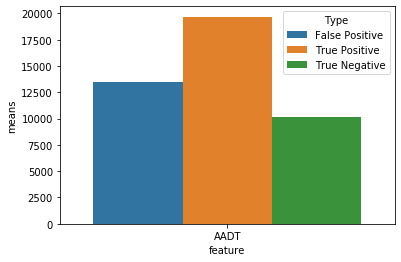

In [49]:
#show traffic density comparison between true positives and false positives
traffic = car_summary[(car_summary.feature == 'AADT')]
sns.barplot(x="feature", y="means", hue='Type', data=traffic)

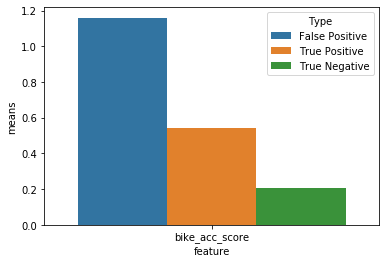

In [50]:
bike_acc = car_summary[car_summary.feature == 'bike_acc_score']
sns.barplot(x="feature", y="means", hue="Type", data=bike_acc)

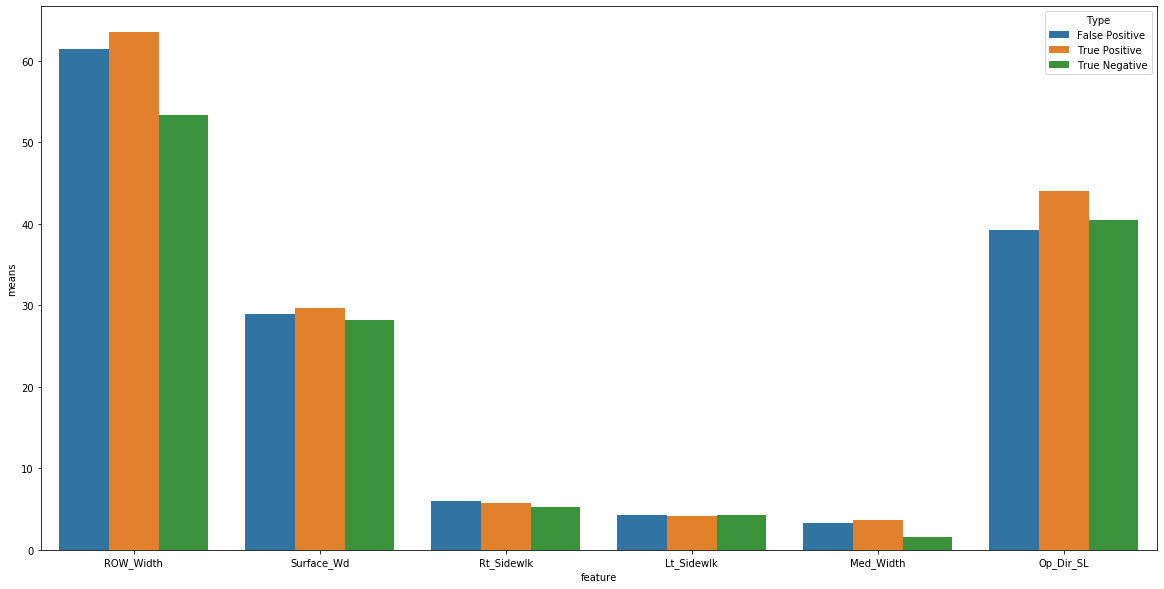

In [51]:
other_features = car_summary[(car_summary.feature != 'bike_acc_score') & 
                             (car_summary.feature != 'AADT') &
                            (car_summary.feature != 'traffic_density')]
plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="means", hue="Type", data=other_features)

In [ ]:
car_true_neg = X_car_c_test[(pred == y_car_c_test) & (y_car_c_test == 0)]
car_true_neg_means = car_true_neg[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 'Surface_Tp',
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']

So looking for high traffic, and potentially wide rights of way annd wide medians may reveal locations where accidents will happen in the future.

Now exploring the same comparisons for bike accidents.

In [52]:
#build smaller feature set
#read in data set before making dummies
bike_df = pd.read_csv('data/cleaned_data/model_df.csv')
bike_df = bike_df[['car_acc_score', 'bike_acc_score', 'AADT', 'City', 'ROW_Width', 'Surface_Wd', 
                 'Jurisdictn', 'Rt_Sidewlk', 'Lt_Sidewlk', 'Route_Direction', 'Med_Width',
                 'Op_Dir_SL', 'Struct_Cnd', 'Operation', 'Terrain', 'F_Class']]
bike_dum = pd.get_dummies(bike_df, columns=['City', 'Jurisdictn', 'Route_Direction', 'Struct_Cnd',
                                         'Operation', 'Terrain', 'F_Class'])


bike_c_y = bike_dum.bike_acc_score.mask(bike_dum.bike_acc_score > 0, 1)
bike_X = bike_dum.drop(columns=['bike_acc_score'])
# do train test split
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [53]:
#use the best performing classifier on the reduced feature set
gbc = ensemble.GradientBoostingClassifier(random_state=18, 
                                          n_estimators=500, 
                                          learning_rate=0.2, 
                                          max_features=None,
                                         min_samples_split=10,
                                         max_depth=5)
bc.fit(X_bike_c_train, y_bike_c_train)
pred = bc.predict(X_bike_c_test)

# create dataframe of false positives
# create dataframe of true positives
# compare on top 10 features
bike_false_pos = X_bike_c_test[pred > y_bike_c_test]
bike_true_pos = X_bike_c_test[(pred == y_bike_c_test) & (y_bike_c_test == 1)]

bike_false_pos.describe()

,car_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,City_-1,City_26,...,Terrain_1,Terrain_2,Terrain_3,F_Class_-1,F_Class_0,F_Class_1,F_Class_2,F_Class_3,F_Class_5,F_Class_6
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.0,...,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,0.829893,15711.157877,59.814408,28.835661,7.729118,5.589874,2.165893,41.734104,0.000826,0.0,...,0.887696,0.093311,0.017341,0.001652,0.377374,0.017341,0.028076,0.288192,0.221305,0.066061
std,2.587152,24034.757834,30.423020,10.792082,4.239799,4.571020,11.146028,26.825090,0.028736,0.0,...,0.315870,0.290988,0.130593,0.040622,0.484930,0.130593,0.165258,0.453108,0.415297,0.248492
min,0.000000,10.000000,9.000000,7.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1154.000000,40.000000,22.000000,6.000000,0.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,10489.000000,55.000000,26.000000,8.000000,6.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,19191.500000,80.000000,35.000000,10.000000,8.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,42.000000,168186.000000,200.000000,80.000000,24.000000,27.000000,180.000000,99.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
bike_true_pos.describe()

,car_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,City_-1,City_26,...,Terrain_1,Terrain_2,Terrain_3,F_Class_-1,F_Class_0,F_Class_1,F_Class_2,F_Class_3,F_Class_5,F_Class_6
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.0,...,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,3.587559,18259.755678,66.988388,29.618614,8.678475,5.689323,3.016332,41.376372,0.002614,0.0,...,0.936749,0.055410,0.005227,0.004182,0.248824,0.016205,0.023001,0.417669,0.231051,0.059070
std,7.592718,23009.455958,32.817126,10.027635,4.412135,5.161501,12.736405,26.643597,0.051071,0.0,...,0.243478,0.228839,0.072130,0.064549,0.432445,0.126296,0.149944,0.493304,0.421615,0.235816
min,0.000000,10.000000,10.000000,8.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3692.000000,46.000000,24.000000,7.000000,0.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,11078.000000,60.000000,28.000000,8.000000,6.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,20951.000000,81.000000,36.000000,10.000000,10.000000,0.000000,30.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,59.000000,168186.000000,200.000000,76.000000,26.000000,27.000000,240.000000,99.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#construct summary dataframe
bike_false_means = bike_false_pos[['car_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 
                                 'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 
                                 'Op_Dir_SL']].describe().loc['mean']
bike_true_means = bike_true_pos[['car_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 
                                 'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 
                                 'Op_Dir_SL']].describe().loc['mean']
bike_false_summary = pd.DataFrame({"means": bike_false_means})
bike_false_summary['Type'] = 'False Positive'

In [57]:
bike_true_summary = pd.DataFrame({"means": bike_true_means})
bike_true_summary['Type'] = 'True Positive'
bike_summary = bike_false_summary.append(bike_true_summary)
bike_summary = bike_summary.reset_index()
bike_summary = bike_summary.rename(columns={'index' : 'feature'})

In [58]:
bike_true_neg = X_bike_c_test[(pred == y_bike_c_test) & (y_bike_c_test == 0)]
bike_true_neg_means = bike_true_neg[['car_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 
                                 'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 
                                 'Op_Dir_SL']].describe().loc['mean']

bike_neg_summary = pd.DataFrame({"means": bike_true_neg_means})
bike_neg_summary['Type'] = 'True Negative'
bike_neg_summary = bike_neg_summary.reset_index()
bike_neg_summary = bike_neg_summary.rename(columns={'index' : 'feature'})

bike_summary = bike_summary.append(bike_neg_summary)
bike_summary

,feature,means,Type
0,car_acc_score,0.829893,False Positive
1,AADT,15711.157877,False Positive
2,ROW_Width,59.814408,False Positive
3,Surface_Wd,28.835661,False Positive
4,Rt_Sidewlk,7.729118,False Positive
5,Lt_Sidewlk,5.589874,False Positive
6,Med_Width,2.165893,False Positive
7,Op_Dir_SL,41.734104,False Positive
8,car_acc_score,3.587559,True Positive
9,AADT,18259.755678,True Positive


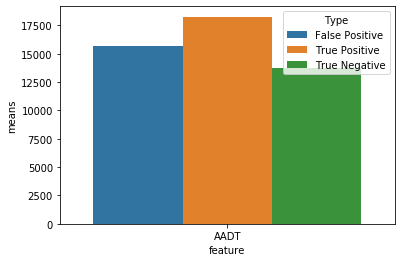

In [59]:
#show traffic density comparison between true positives and false positives
traffic = bike_summary[(bike_summary.feature == 'AADT')]
sns.barplot(x="feature", y="means", hue='Type', data=traffic)

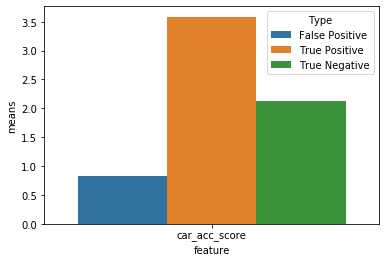

In [60]:
car_acc = bike_summary[bike_summary.feature == 'car_acc_score']
sns.barplot(x="feature", y="means", hue="Type", data=car_acc)

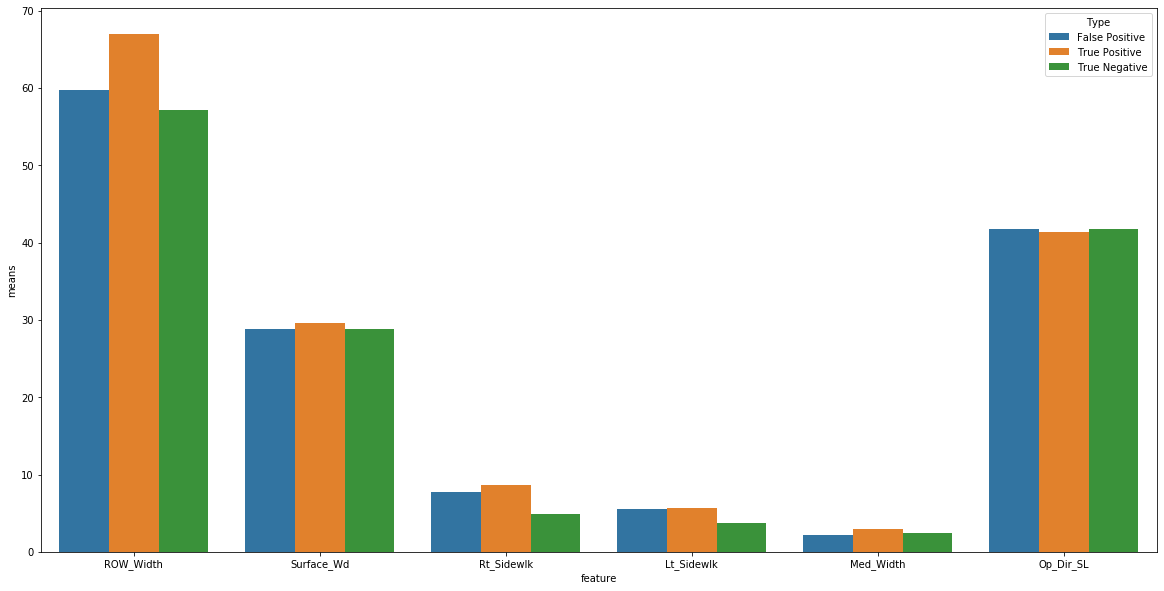

In [61]:
other_features = bike_summary[(bike_summary.feature != 'car_acc_score') & 
                             (bike_summary.feature != 'AADT') &
                            (bike_summary.feature != 'traffic_density')]
plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="means", hue="Type", data=other_features)

## Model Sensitivity ##

Machine learning models can be used to predict how changes in features might predict changes in outcome. Since traffic is something that can change easily, I decided to look at the effect of increased traffic on predicted bike and car accidents.

I want to do this on the best model, so I first I need to set that up for car accidents.

In [77]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score', 'AADT'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score', 'AADT'])

In [78]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [79]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', 
                                      n_estimators=400,
                                      min_samples_split=2, 
                                      max_depth=65,
                                      max_features=None,
                                      random_state=18)
rfc.fit(X_car_c_train, y_car_c_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=65, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=18, verbose=0,
                       warm_start=False)

In [80]:
gbc = ensemble.GradientBoostingClassifier(random_state=18, 
                                          n_estimators=100, 
                                          min_samples_split=20,
                                          max_features=None, 
                                          max_depth=10, 
                                          learning_rate=0.1)
gbc.fit(X_bike_c_train, y_bike_c_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=18, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Now I will fake some data to show how increasing traffic increases predicted accidents.

In [82]:
current_car_acc = sum(y_car_c_test)
current_bike_acc = sum(y_bike_c_test)
car_pred_arr = []
bike_pred_arr = []

percents = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
for p in percents:
    X_car = X_car_c_test.copy()
    X_bike = X_bike_c_test.copy()
    X_car['traffic_density'] = X_car['traffic_density'] * (1 + p)
    X_bike['traffic_density'] = X_bike['traffic_density'] * (1 + p)
    pred_car = rfc.predict(X_car)
    pred_bike = gbc.predict(X_bike)
    if (p >= 0.01):
        pct = round(p*100)
    else:
        pct = p*100
    car_pct_more = round(((sum(pred_car) - current_car_acc)/current_car_acc)*100)
    bike_pct_more = round(((sum(pred_bike) - current_bike_acc)/current_bike_acc)*100)
    print("{}% more traffic could lead to {}% more car accidents, or {} additional accidents."
          .format(pct, car_pct_more, sum(pred_car) - current_car_acc))
    print("{}% more traffic could lead to {}% more bike accidents, or {} additional accidents."
          .format(pct, bike_pct_more, sum(pred_bike) - current_bike_acc))
    print()
    car_pred_arr.append(car_pct_more)
    bike_pred_arr.append(bike_pct_more)

0.1% more traffic could lead to -2.0% more car accidents, or -182 additional accidents.
0.1% more traffic could lead to 151.0% more bike accidents, or 7113 additional accidents.

0.5% more traffic could lead to -2.0% more car accidents, or -200 additional accidents.
0.5% more traffic could lead to 151.0% more bike accidents, or 7106 additional accidents.

1% more traffic could lead to 82.0% more car accidents, or 7987 additional accidents.
1% more traffic could lead to 155.0% more bike accidents, or 7317 additional accidents.

2% more traffic could lead to 82.0% more car accidents, or 7977 additional accidents.
2% more traffic could lead to 155.0% more bike accidents, or 7308 additional accidents.

3% more traffic could lead to 82.0% more car accidents, or 7959 additional accidents.
3% more traffic could lead to 155.0% more bike accidents, or 7284 additional accidents.

4% more traffic could lead to 81.0% more car accidents, or 7932 additional accidents.
4% more traffic could lead to 1

The prediction is pretty sensitive,  and once it jumps up, I'm not sure it's very accurate anymore, but within a few percent, it shows a believable level of increased accidents for additional traffic.

In [ ]:
inc_df = pd.DataFrame({'Traffic Increase': percents, 'Percent Accident Increase': car_pred_array})
inc_df['Type'] = 'Car'
temp_df = pd.DataFrame({'Traffic Increase': percents, 'Percent Accident Increase': bike_pred_array})
temp_df['Type'] = 'Bike'
inc_df = inc_df.append(temp_df)
inc_df